In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train_data = "D:\\projects\\plant_disease\\data\\train"
number_of_classes =len(os.listdir(train_data))
number_of_classes


11

In [3]:
category = []
for i in os.listdir(train_data):
    category.append(i)
category=np.array(category)    

In [4]:
category.shape

(11,)

In [5]:
def read_dataset(path_data):
    X = []
    Y = []
    for i in os.listdir(path_data):
        for j in os.listdir(os.path.join(path_data,i)):
            Y.append(i)
            image = cv2.imread(os.path.join(path_data,i,j))
            resized = cv2.resize(image,(64,64))
            resized=resized/255.0
            X.append(resized)
    return (np.array(X),np.array(Y))



In [6]:
X,Y = read_dataset(str(train_data))

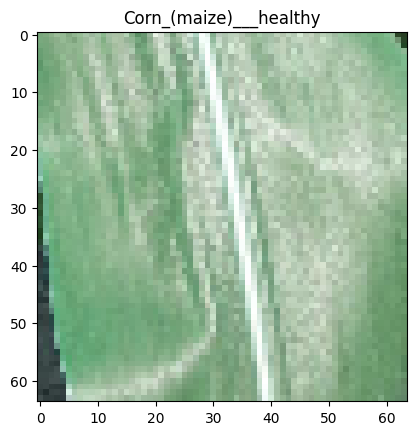

In [7]:
#visualising the data
n = random.randint(0,len(X))
plt.title(label = Y[n])
plt.imshow(X[n],cmap='gray')



In [8]:
Y = pd.get_dummies(Y).astype('int')
Y.shape

(20337, 11)

In [9]:
Xtest,Ytest = read_dataset(str("D:\\projects\\plant_disease\\data\\valid"))

In [10]:
Ytest = pd.get_dummies(Ytest).astype("int")

In [11]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [12]:
#build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=4,kernel_size=3,padding="valid",activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=8,kernel_size=3,padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(filters=16,kernel_size=3,padding="same",activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(category),activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 4)         112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 4)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 4)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 8)         296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 8)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 8)         0

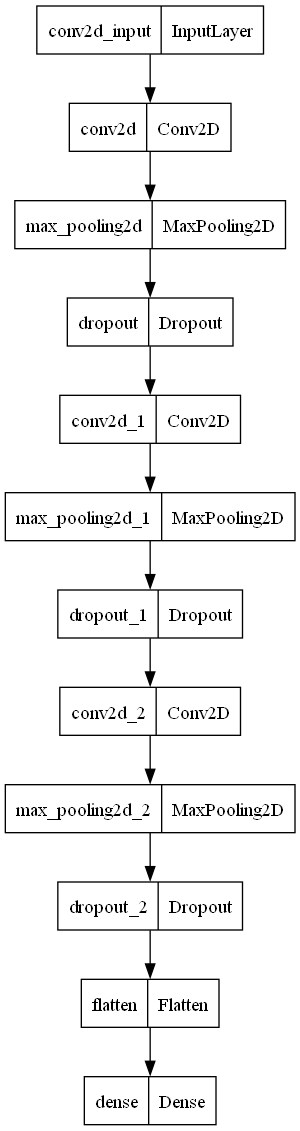

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer='adam')

In [16]:
hist = model.fit(x=X,y=Y,epochs=10,batch_size=4,
                    validation_data=(Xtest,Ytest))

Epoch 1/10
5085/5085 [==============================] - 62s 7ms/step - loss: 0.7962 - accuracy: 0.7151 - val_loss: 0.5151 - val_accuracy: 0.8145
Epoch 2/10
5085/5085 [==============================] - 38s 7ms/step - loss: 0.4016 - accuracy: 0.8572 - val_loss: 0.3390 - val_accuracy: 0.8865
Epoch 3/10
5085/5085 [==============================] - 37s 7ms/step - loss: 0.3344 - accuracy: 0.8806 - val_loss: 0.3168 - val_accuracy: 0.8816
Epoch 4/10
5085/5085 [==============================] - 38s 7ms/step - loss: 0.2921 - accuracy: 0.8958 - val_loss: 0.3455 - val_accuracy: 0.8843
Epoch 5/10
5085/5085 [==============================] - 38s 8ms/step - loss: 0.2612 - accuracy: 0.9087 - val_loss: 0.2162 - val_accuracy: 0.9276
Epoch 6/10
5085/5085 [==============================] - 38s 8ms/step - loss: 0.2404 - accuracy: 0.9160 - val_loss: 0.2346 - val_accuracy: 0.9196
Epoch 7/10
5085/5085 [==============================] - 42s 8ms/step - loss: 0.2233 - accuracy: 0.9193 - val_loss: 0.1946 - val_ac

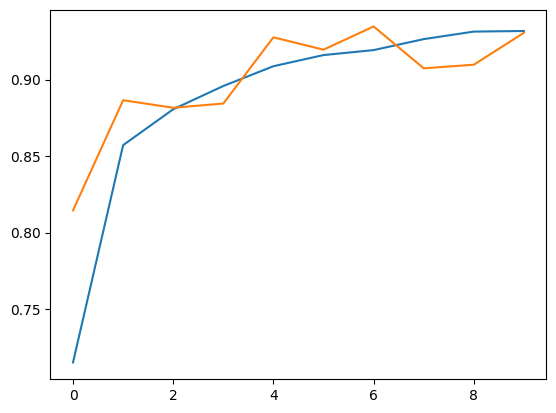

In [28]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)